# Cohort Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
online = pd.read_csv('online.csv')
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [3]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [6]:
# Based on days, get invoice date with year, month, and day; get cohort month, which is the minimum of each customer's invoice date.

def get_day(x): return dt.datetime(x.year, x.month, x.day)
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day)
grouping = online.groupby('CustomerID')['InvoiceDay']
online['CohortDay'] = grouping.transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-14
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-23
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-02-25


In [18]:
# Get cohort index for each cohort month (based on days)

def get_day_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

invoice_year, invoice_month, invoice_day = get_day_int(online,'InvoiceDay')
cohort_year, cohort_month, cohort_day = get_day_int(online, 'CohortDay')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
day_diff = invoice_day - cohort_day
online['CohortIndex'] = year_diff * 365 + month_diff * 30 + day_diff + 1
online.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,CohortDay,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-04-11,195
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-09-12,69


In [8]:
# Get cohort index for each cohort month (based on months)

online = pd.read_csv('online.csv')
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

def get_day(x): return dt.datetime(x.year, x.month, 1) # set day always equals to zero
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')

def get_day_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year,month,day

invoice_year, invoice_month, invoice_day = get_day_int(online,'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_day_int(online, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
day_diff = invoice_day - cohort_day
online['CohortIndex'] = year_diff * 12 + month_diff + 1
online.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3


In [19]:
# Get retention pivot table

grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data['CohortMonth'] = cohort_data['CohortMonth'].astype('str')
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size, axis = 0)
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.160643,0.172691,0.144578,0.208835,0.232932,0.244980,0.088353,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.159420,0.125604,0.198068,0.236715,0.299517,0.091787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.161850,0.179191,0.219653,0.254335,0.098266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.215827,0.201439,0.251799,0.100719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Get average unit price pivot table

cohort_data_avg = grouping['UnitPrice'].mean().reset_index()
cohort_data_avg['CohortMonth'] = cohort_data_avg['CohortMonth'].astype('str')
avg_price = cohort_data_avg.pivot(index = 'CohortMonth',columns = 'CohortIndex',values = 'UnitPrice').round(1)
avg_price

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,3.0,3.0,3.0,2.8,2.7,6.9,2.8,3.0,2.7,2.7,3.0,2.8,2.6
2011-01-01,3.2,3.1,3.0,3.0,3.1,3.0,3.0,2.5,2.7,2.9,2.6,2.0,NaN
2011-02-01,3.1,4.0,3.3,2.9,3.3,2.9,2.8,2.7,2.9,2.7,3.1,NaN,NaN
2011-03-01,3.5,3.6,3.5,2.8,2.7,2.5,2.7,2.9,2.5,2.4,NaN,NaN,NaN
2011-04-01,3.3,4.4,3.4,2.6,2.8,2.8,2.8,2.6,2.6,NaN,NaN,NaN,NaN
2011-05-01,3.1,2.8,2.5,2.7,2.5,2.3,2.7,2.3,NaN,NaN,NaN,NaN,NaN
2011-06-01,2.8,2.4,2.7,3.1,2.5,2.4,2.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,3.2,3.1,3.4,2.5,2.4,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,2.9,3.7,5.4,6.9,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


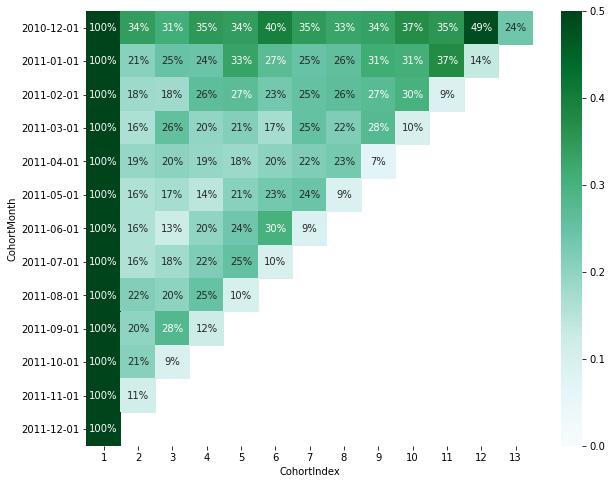

In [21]:
# Visualize retention pivot table using heatmap

plt.figure(figsize = (10,8))
plt.title = 'Rentention Rate'
sns.heatmap(data = retention,
    fmt = '.0%',
    annot = True,
    vmin = 0.0,
    vmax = 0.5,
    cmap = 'BuGn')
plt.show()

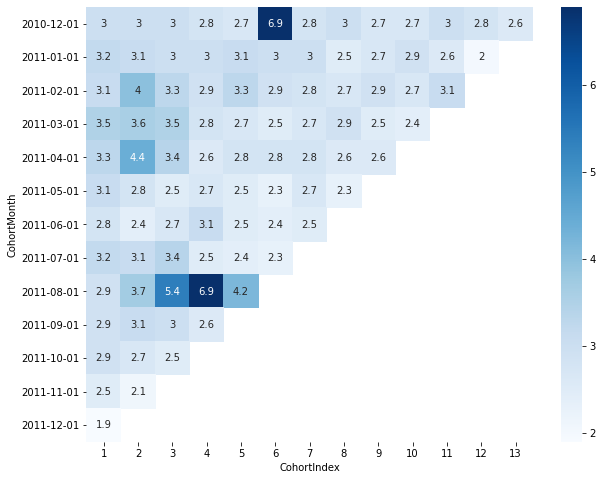

In [85]:
plt.figure(figsize = (10,8))
plt.title = 'Rentention Rate'
sns.heatmap(data = avg_price,
    annot = True,
    cmap = 'Blues')
plt.show()

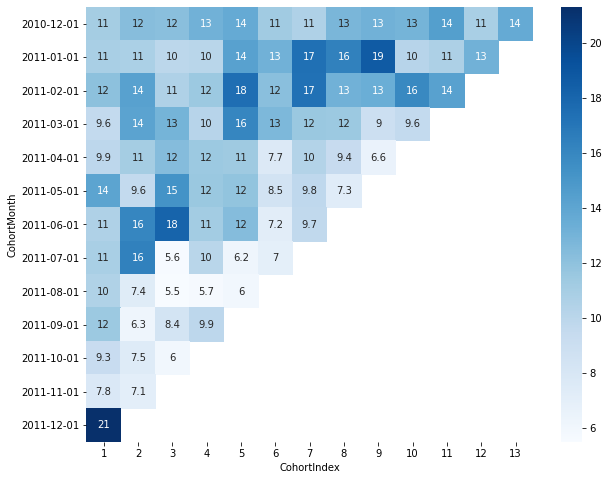

In [88]:
# heatmap of average quantity

cohort_data_avg_quantity = grouping['Quantity'].mean().reset_index()
cohort_data_avg_quantity['CohortMonth'] = cohort_data_avg_quantity['CohortMonth'].astype('str')
avg_quantity = cohort_data_avg_quantity.pivot(index = 'CohortMonth',columns = 'CohortIndex',values = 'Quantity').round(1)
plt.figure(figsize = (10,8))
plt.title = 'Rentention Rate'
sns.heatmap(data = avg_quantity,
    annot = True,
    cmap = 'Blues')
plt.show()

# RFM Analysis

In [ ]:
# Create a spend quartile with 4 groups - a range between 1 and 5
spend_quartile = pd.qcut(data['Spend'], q=4, labels=range(1,5))

# Assign the quartile values to the Spend_Quartile column in data
data['Spend_Quartile'] = spend_quartile

# Print data with sorted Spend values
print(data.sort_values(by = 'Spend'))

# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels 
recency_quartiles = pd.qcut(data['Recency_Days'], q=4, labels=r_labels)

# Assign the quartile values to the Recency_Quartile column in `data`
data['Recency_Quartile'] = recency_quartiles 

# Print `data` with sorted Recency_Days values
print(data.sort_values('Recency_Days'))

In [91]:
# Create Recency, Frequency, MonetaryValue columns
snapshot_date = online['InvoiceDate'].max() + dt.timedelta(days=1)
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
datamart = online.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [92]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1,4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(datamart['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(datamart['Frequency'], q=3, labels=f_labels)

# Create new columns R and F 
datamart = datamart.assign(R=r_groups.values, F=f_groups.values)

# Create labels for MonetaryValue
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(datamart['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
datamart = datamart.assign(M=m_groups.values)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis = 1)
print(datamart['RFM_Score'].head())

CustomerID
12747    9.0
12748    9.0
12749    9.0
12820    9.0
12822    6.0
Name: RFM_Score, dtype: float64


In [93]:
# Define RFM_Score category.
def rfm_level(df):
    if df['RFM_Score'] >= 10:
        return 'Top'
    elif df['RFM_Score'] >= 6 and df['RFM_Score'] < 10 :
        return 'Middle'
    else:
        return 'Low'

# Create a new variable RFM_Level
datamart['RFM_Level'] = datamart.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
print(datamart.head(5))

            Recency  Frequency  MonetaryValue  R  F  M  RFM_Score RFM_Level
CustomerID                                                                 
12747             2         27         992.82  3  3  3        9.0    Middle
12748             1        967        7522.06  3  3  3        9.0    Middle
12749             4         37         813.45  3  3  3        9.0    Middle
12820             3         17         268.02  3  3  3        9.0    Middle
12822            71          9         146.15  2  2  2        6.0    Middle


In [94]:
#Analysis

rfm_level_agg = datamart.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
  
  	# Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Level                                      
Low         161.5       4.5          86.9  1649
Middle       40.3      30.9         616.5  2052


## Data pre-processing for clustering

In [1]:
# Print the average values of the variables in the dataset
print(data.mean())

# Print the standard deviation of the variables in the dataset
print(data.std())

# Get the key statistics of the dataset
print(data.describe())

plt.subplot(3, 1, 1); sns.distplot(data['var1'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(data['var2'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(data['var3'])

# Show the plot
plt.show()

data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.distplot(data['var2_log'])

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.distplot(data['var3_log'])

# Show the plot
plt.show()

# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

from sklearn.preprocessing import StandardScaler
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3,1,2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3,1,3); sns.distplot(datamart_rfm['MonetaryValue'])

# Show the plot
plt.show()

# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['MonetaryValue'])

# Show the plot
plt.show()



NameError: name 'data' is not defined

## Customer Segmentation with K-means

In [ ]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = datamart_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)


## Find optimal number of cluster
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(data_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Snake Plot
# Melt the normalized dataset and reset the index
datamart_melt = pd.melt(
  					datamart_normalized.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['Recency', 'Frequency', 'MonetaryValue'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value'
					)
# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.lineplot(data=datamart_melt, x='Metric', y='Value', hue='Cluster')
plt.show()

##### Calculate relative importance
# Calculate average RFM values for each cluster
cluster_avg = datamart_rfm_k3.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = datamart_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1

# Print relative importance scores rounded to 2 decimals
print(relative_imp.round(2))

# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(8,2))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap ='RdYlGn')
plt.show()

# Import StandardScaler 
from sklearn.preprocessing import StandardScaler

# Apply log transformation
datamart_rfmt_log = np.log(datamart_rfmt)

# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(datamart_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
datamart_rfmt_normalized = scaler.transform(datamart_rfmt_log)

# Fit KMeans and calculate SSE for each k between 1 and 10
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(datamart_rfmt_normalized)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_   

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(datamart_rfmt_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame by adding a cluster label column to datamart_rfmt
datamart_rfmt_k4 = datamart_rfmt.assign(Cluster= cluster_labels)

# Group by cluster
grouped = datamart_rfmt_k4.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Tenure': ['mean', 'count']
  }).round(1)